In [80]:
import pandas as pd 
import numpy as np 

In [81]:
df=pd.read_json('dataset.json')
df.head()

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival


In [82]:
df.shape

(1222, 2)

In [83]:
len(df['internalStatus'].value_counts())

15

<Axes: xlabel='internalStatus'>

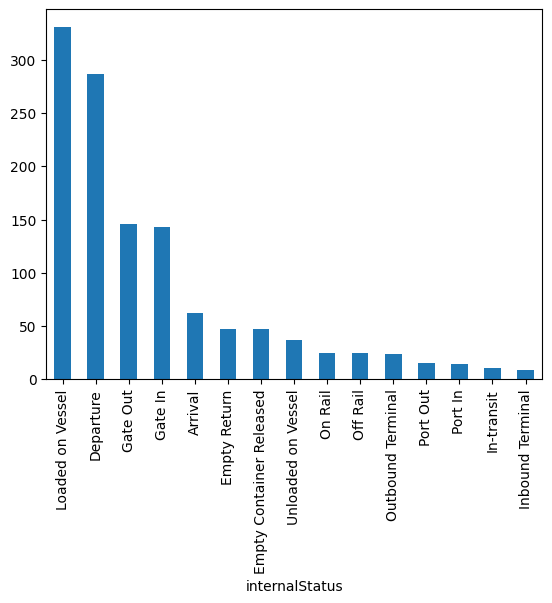

In [84]:
df['internalStatus'].value_counts().plot(kind='bar')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   externalStatus  1222 non-null   object
 1   internalStatus  1222 non-null   object
dtypes: object(2)
memory usage: 19.2+ KB


In [86]:

#from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rosireddyvangala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rosireddyvangala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
stopwords=nltk.corpus.stopwords.words('english')

In [88]:
def word_tokens(text):
  word_tokenize(text.lower())
  tokens=[]
  for word in text.split():
    if word not in stopwords:
      tokens.append(word)

  return tokens

In [89]:
tokenized_sentences=df['externalStatus'].apply(word_tokens)

In [90]:
len(list(tokenized_sentences[0]))

2

In [91]:
word_tokens=[word_token for sentence_tokens in list(tokenized_sentences) for word_token in sentence_tokens]
max_features=len(set(word_tokens))

In [92]:
word_tokens

['PORT',
 'OUT',
 'TERMINAL',
 'IN',
 'PORT',
 'IN',
 'Vessel',
 'departure',
 'first',
 'POL',
 '(Vessel',
 'name',
 ':',
 'TIAN',
 'FU',
 'HE)',
 'Vessel',
 'arrival',
 'final',
 'POD',
 '(Vessel',
 'name',
 ':',
 'TIAN',
 'FU',
 'HE)',
 'DEPARTCU',
 'Gate',
 'Load',
 'MAERSK',
 'SEMBAWANG',
 '/',
 '237E',
 'Discharge',
 'Gate',
 'Gate',
 'Load',
 'MSC',
 'SVEVA',
 '/',
 '248E',
 'Discharge',
 'Gate',
 'DEPARTCU',
 'Gate',
 'Load',
 'MAERSK',
 'SEMBAWANG',
 '/',
 '237E',
 'Discharge',
 'Gate',
 'Gate',
 'Load',
 'MSC',
 'SVEVA',
 '/',
 '248E',
 'Discharge',
 'Gate',
 'Gate',
 'Load',
 '(Vessel',
 'name',
 ':',
 'MSC',
 'ORION)',
 'Discharge',
 '(Vessel',
 'name',
 ':',
 'MSC',
 'ORION)',
 'On',
 'rail',
 'Off',
 'rail',
 'Gate',
 'Gate',
 'out,',
 'Empty',
 'Gate',
 'Load',
 'MAERSK',
 'SEMBAWANG',
 '/',
 '237E',
 'Discharge',
 'On',
 'rail',
 'Off',
 'rail',
 'Gate',
 'Gate',
 'out,',
 'Empty',
 'Gate',
 'Load',
 'MSC',
 'ORION',
 '/',
 '227N',
 'Discharge',
 'On',
 'rail',
 'Off',


In [93]:
maxi=0
for i in list(tokenized_sentences):
    if len(i)>maxi:
        maxi=len(i)

maxi


10

In [94]:
from tensorflow.keras.layers import TextVectorization


In [95]:
vectorizer = TextVectorization(max_tokens=max_features,
                               output_sequence_length=maxi,
                               output_mode='int')

In [96]:
X=df['externalStatus']
y=df['internalStatus']

In [97]:
'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)  # Output: [2 1 0 2] 

# One-Hot Encoding
encoder = OneHotEncoder()
y_onehot = encoder.fit_transform(y_encoded.reshape(-1, 1))
print(y_onehot)'''

'from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nle = LabelEncoder()\ny_encoded = le.fit_transform(y)\nprint(y_encoded)  # Output: [2 1 0 2] \n\n# One-Hot Encoding\nencoder = OneHotEncoder()\ny_onehot = encoder.fit_transform(y_encoded.reshape(-1, 1))\nprint(y_onehot)'

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Assuming y is an array or list of your labels


In [142]:
label_mapping = dict(zip(le.transform(le.classes_),le.classes_))

In [143]:
label_mapping

{0: 'Arrival',
 1: 'Departure',
 2: 'Empty Container Released',
 3: 'Empty Return',
 4: 'Gate In',
 5: 'Gate Out',
 6: 'In-transit',
 7: 'Inbound Terminal',
 8: 'Loaded on Vessel',
 9: 'Off Rail',
 10: 'On Rail',
 11: 'Outbound Terminal',
 12: 'Port In',
 13: 'Port Out',
 14: 'Unloaded on Vessel'}

In [99]:
from keras.utils import to_categorical
y = to_categorical(y_encoded)

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
vectorizer.adapt(X.values)

In [137]:
# Get the standalone vocabulary (important step)
vocabulary = vectorizer.get_vocabulary()
# Save the config along with the vocabulary
config = vectorizer.get_config()
config['vocabulary'] = vocabulary  


In [138]:
import json
with open('vectorizer_config.json', 'w') as f:
    json.dump(config, f)

In [103]:
xtrain_vectorized_text = vectorizer(x_train.values)

In [104]:
xtest_vectorized_text = vectorizer(x_test.values)

In [105]:
xtest_vectorized_text

<tf.Tensor: shape=(245, 10), dtype=int64, numpy=
array([[  2,   4,  13, ...,   0,   0,   0],
       [  8,  15,  39, ...,   0,   0,   0],
       [ 17,   4,   0, ...,   0,   0,   0],
       ...,
       [  8,   0,   0, ...,   0,   0,   0],
       [  7,   3, 110, ...,   0,   0,   0],
       [ 38,  36,  24, ...,   0,   0,   0]])>

In [106]:
x_vectorized_text = vectorizer(X.values)

In [107]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((x_vectorized_text, y))
dataset = dataset.cache()

In [108]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [109]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(10,), dtype=tf.int64, name=None), TensorSpec(shape=(15,), dtype=tf.float64, name=None))>

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [111]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(max_features+1, 32))
# Bidirectional LSTM Layer
model.add(LSTM(32, activation='tanh'))
# Feature extractor Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Final layer 
model.add(Dense(15, activation='softmax'))

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [114]:
xtrain_vectorized_text

<tf.Tensor: shape=(977, 10), dtype=int64, numpy=
array([[ 2,  6,  0, ...,  0,  0,  0],
       [38,  5,  3, ...,  0,  0,  0],
       [ 2,  4,  0, ...,  0,  0,  0],
       ...,
       [ 5, 11, 41, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 5, 11, 41, ...,  0,  0,  0]])>

In [115]:
print(x_train.dtype)

object


In [116]:
model.fit(xtrain_vectorized_text,y_train, epochs=20,validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2133 - loss: 2.6399 - val_accuracy: 0.2551 - val_loss: 2.1058
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 2.1170 - val_accuracy: 0.2653 - val_loss: 1.9324
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.8685 - val_accuracy: 0.2500 - val_loss: 1.5782
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3322 - loss: 1.5050 - val_accuracy: 0.6939 - val_loss: 1.0497
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.9350 - val_accuracy: 0.8163 - val_loss: 0.5671
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.5781 - val_accuracy: 0.8316 - val_loss: 0.4597
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.5321 - val_accuracy: 0.8265 - val_loss: 0.4109
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.4331 - val_accuracy: 0.8316 - val_loss:

In [117]:
pos=model.predict(xtest_vectorized_text)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [118]:
y_pred=np.argmax(pos,axis=1)

In [119]:
ytest_decoded=np.argmax(y_test,axis=1)

In [120]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest_decoded,y_pred)
#precision=Precision(ytest_decoded,y_pred)
#recall=Recall(ytest_decoded,y_pred)
print(accuracy)
'''print(precision)
print(recall)'''

0.9428571428571428


'print(precision)\nprint(recall)'

In [121]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [122]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [123]:
pre(ytest_decoded,y_pred)
pre.result().numpy()

1.0

In [124]:
re(ytest_decoded,y_pred)
re.result().numpy()

0.99570817

In [125]:
acc(ytest_decoded,y_pred)
acc.result().numpy()

1.0

In [141]:
import pickle

pickle.dump(model,open('sd_model.pkl','wb'))
pickle.dump(vectorizer,open('vect.pkl','wb'))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [135]:
model.save('my_complete_model.h5')